In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [26]:
df = pd.read_csv("/content/ifood_df.csv")
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education

In [25]:
print("\nDataset Shape:", df.shape)
print("\nDataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())


Dataset Shape: (2021, 40)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2021 entries, 0 to 2204
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2021 non-null   float64
 1   Kidhome               2021 non-null   int64  
 2   Teenhome              2021 non-null   int64  
 3   Recency               2021 non-null   int64  
 4   MntWines              2021 non-null   int64  
 5   MntFruits             2021 non-null   int64  
 6   MntMeatProducts       2021 non-null   int64  
 7   MntFishProducts       2021 non-null   int64  
 8   MntSweetProducts      2021 non-null   int64  
 9   MntGoldProds          2021 non-null   int64  
 10  NumDealsPurchases     2021 non-null   int64  
 11  NumWebPurchases       2021 non-null   int64  
 12  NumCatalogPurchases   2021 non-null   int64  
 13  NumStorePurchases     2021 non-null   int64  
 14  NumWebVisitsMonth     2021 non-null

In [24]:
df.drop_duplicates(inplace=True)

In [23]:
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntReg

In [22]:
features = df[['Income', 'Recency', 'NumWebPurchases',
               'NumStorePurchases', 'MntTotal']]
print("\nSelected Features:")
print(features.head())


Selected Features:
    Income  Recency  NumWebPurchases  NumStorePurchases  MntTotal
0  58138.0       58                8                  4      1529
1  46344.0       38                1                  2        21
2  71613.0       26                8                 10       734
3  26646.0       26                2                  4        48
4  58293.0       94                5                  6       407


In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

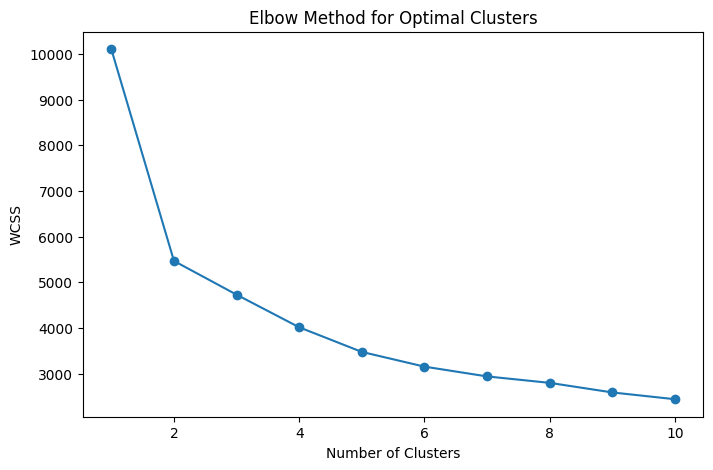

In [29]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print("\nClustered Data:")
print(df.head())


Clustered Data:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_Graduat

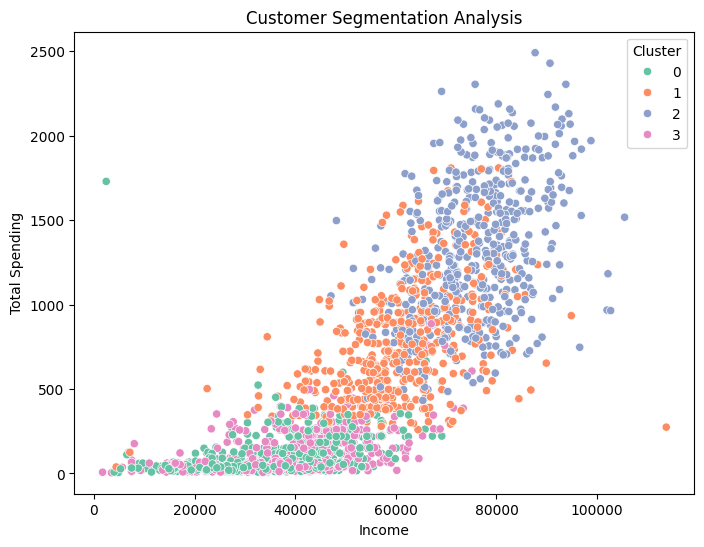

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Income'],
    y=df['MntTotal'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segmentation Analysis")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.show()

In [20]:
cluster_summary = df.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        34484.422348  0.736742  0.465909  24.632576   51.079545   5.992424   
1        60272.869748  0.214286  0.771008  49.521008  465.176471  32.825630   
2        75640.451172  0.054688  0.289062  47.150391  661.880859  60.537109   
3        37295.798020  0.746535  0.532673  75.384158   63.651485   6.928713   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              27.804924         8.549242          5.270833     18.702652   
1             173.302521        47.018908         34.577731     65.367647   
2             434.187500        86.371094         62.871094     72.949219   
3              31.940594         9.663366          7.283168     20.645545   

         ...  marital_Together  marital_Wido